# TRAVEL  DESTINATION RECOMMENDATION SYSTEM

#### Authors
 1 Dennis Mwanzia
 
 2 Pamela Awino
 
 3 Joshua Rwanda
 
 4 Nelson Kemboi
 
 5 Pauline Wambui
 
 6 Kane Muendo
 
 7 Ian Macharia

## 1.0 BUSINESS UNDERSTANDING

## 1.1 OVERVIEW

 AfricuraAI is a business dedicated to revolutionizing the way tourists explore Africa by lever-aging the power of machine learning and recommendation systems. With the understanding that tourists often face challenges in finding suitable travel destinations that meet their prefer-ences, budget, and time constraints, AfricuraAI aims to provide personalized recommendations for the best tourist destinations in Africa.
Our core objective is to develop a robust machine learning model that analyzes various factors, including customer reviews, budget limitations, specific locations, available amenities, and res-idence types, to suggest the ideal tourist destination that aligns with each user's unique prefer-ences. By considering these factors and analyzing text reviews, our model seeks to accurately predict the preferred tourist destinations for both new and existing users.
The AfricuraAI project brings immense value by addressing a real-world problem faced by tourists, namely the lack of personalized recommendations when planning their trips in Africa. By employing machine learning algorithms and examining a wide range of factors, our model aims to enhance the travel experience by suggesting destinations that not only meet the users' preferences but also fulfill their specific requirements.
Through the AfricuraAI platform, tourists will have access to a comprehensive and tailored travel planning experience. They can input their budget limitations, desired location prefer-ences, preferred amenities, physical attractions of interest, and desired residence type. Our ma-chine learning model will then analyze these inputs along with customer reviews and available data to provide the most suitable and personalized recommendations for the best tourist desti-nations in Africa.
With AfricuraAI, tourists will no longer struggle to find suitable travel destinations within their budget and time constraints. They can confidently plan and embark on a satisfying trip, know-ing that their preferences and requirements have been taken into account. By harnessing the power of data analysis and machine learning, AfricuraAI is poised to revolutionize the way tourists explore Africa and create unforgettable travel experiences.



## 1.2 Problem Statement

Tourists visiting Africa often struggle to find suitable travel destinations that align with their preferences, making it challenging to plan a satisfying trip within their budget and time constraints. 

Our main aim as AfricuraAI is to develop a machine learning model i.e. recommendation system that provides personalized recommendations for the best tourist destinations in Africa. By considering customer reviews, budget constraints, specific locations, available amenities, and residence type, the model aims to suggest the ideal tourist destination that aligns with the user's preferences.

By analyzing the text reviews along with the additional factors available in the dataset, the project seeks to build a model that accurately predicts the preferred tourist destination for both new and existing users. The model will take into account factors such as customer reviews, budget limitations, location preferences, amenities, physical attractions, and residence type to recommend the most suitable tourist destination in Africa.

The value of this project lies in its ability to address the real-world problem of providing personalized recommendations for tourists in their search for the best tourist destinations in Africa. By utilizing machine learning algorithms and analyzing a range of factors, the project aims to enhance the travel experience for users by suggesting destinations that meet their preferences and requirements.

# 1.3 The Data

We sourced data by scraping destination review data from TripAdvisor. 

##  1.4 Objectives

1. The goal is to build a machine learning model that can accurately predict hotel ratings based on customer reviews, budget constraints, specific locations, and the type of residence. By analyzing the text reviews and incorporating additional factors, such as sentiment analysis, budget range, geographical distance, and residence type, the objective is to develop a robust model that can make accurate predictions for new, unseen hotels. The model will help users make informed decisions when selecting hotels by considering their preferences and constraints.

#### Specifics

> To create a Recommendation system that can be used to suggest travel destinations based on budget.

> To identify top destinations in Africa

> To foster customer loyalty and repeat customers, building long term relationships between customers and travel destinations. 

> To increase customer engagement  and satisfaction by providing comprehensive and accurate information about tourist destinations.

> To generate revenue by engaging travel destinations to have them listed on the site.

> To collect user information and feedback to improve the recommendations in the long run.

## 1.5 Project Goals

1. Build a machine learning model that can accurately predict hotel ratings based on cus-tomer reviews, budget constraints, specific locations, and the type of residence.

2. Establish evaluation metrics to assess the performance of the recommendation system.

3. Deploy and Implement a real-time recommendation feature that can adapt to users' changing preferences and provide up-to-date tourist destination suggestions.


# 1.6 Success Metric

Root Mean Squared Error of close to 0 to evaluate model efficiency.

# 1.7 Methods Used

•	Descriptive Statistics

•	Data Visualization

•	Machine Learning


## 2. 0 DATA UNDERSTANDING

# loading libraries

In [111]:
# Importing necessary libraries
import pandas as pd
import json
import glob
import re


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.metrics import r2_score
from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

import warnings

# Ignore future deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set_style('darkgrid')

## 2. 1 Loading datasets

In [112]:
#func to read json files
def read_json_files(json_files):
    dfs = []
    for file in json_files:
        with open(file) as f:
            json_data = json.load(f)
            df = pd.DataFrame(json_data)
            dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df


In [113]:
json_files = json_files = ['Data/botswana.json', 'Data/capeverde.json', 'Data/drc.json', 'Data/egypt.json',
                           'Data/ethiopia.json', 'Data/ghana.json', 'Data/kenya.json','Data/madagascar.json',
                           'Data/malawi.json', 'Data/morocco.json', 'Data/namibia.json', 'Data/nigeria.json',
                           'Data/rwanda.json','Data/senegal.json', 'Data/seychelles.json', 'Data/south_africa.json',
                           'Data/tanzania.json', 'Data/uganda.json', 'Data/zambia.json']
df = read_json_files(json_files)
df.head()

,id,type,category,subcategories,name,locationString,description,image,photoCount,awards,...,menuWebUrl,establishmentTypes,ownersTopReasons,guideFeaturedInCopy,rentalDescriptions,photos,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",None,https://media-cdn.tripadvisor.com/media/photo-...,24,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",None,https://media-cdn.tripadvisor.com/media/photo-...,84,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",None,https://media-cdn.tripadvisor.com/media/photo-...,21,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",This region of Chobe National Park is known as...,https://media-cdn.tripadvisor.com/media/photo-...,65,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",None,https://media-cdn.tripadvisor.com/media/photo-...,26,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#prnt columns
df.columns

Index(['id', 'type', 'category', 'subcategories', 'name', 'locationString',
       'description', 'image', 'photoCount', 'awards', 'rankingPosition',
       'rating', 'rawRanking', 'phone', 'address', 'addressObj', 'localName',
       'localAddress', 'email', 'latitude', 'longitude', 'webUrl', 'website',
       'rankingString', 'rankingDenominator', 'neighborhoodLocations',
       'nearestMetroStations', 'ancestorLocations', 'ratingHistogram',
       'numberOfReviews', 'reviewTags', 'reviews', 'booking', 'offerGroup',
       'subtype', 'hotelClass', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'roomTips', 'checkInDate', 'checkOutDate', 'offers',
       'hotelClassAttribution', 'localLangCode', 'isClosed', 'isLongClosed',
       'openNowText', 'cuisines', 'mealTypes', 'dishes', 'features',
       'dietaryRestrictions', 'hours', 'menuWebUrl', 'establishmentTypes',
       'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions',
       'photos', 'bedroomInfo', '

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35836 entries, 0 to 35835
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35836 non-null  object 
 1   type                   35836 non-null  object 
 2   category               35836 non-null  object 
 3   subcategories          34497 non-null  object 
 4   name                   35836 non-null  object 
 5   locationString         34497 non-null  object 
 6   description            20129 non-null  object 
 7   image                  28495 non-null  object 
 8   photoCount             35836 non-null  int64  
 9   awards                 34497 non-null  object 
 10  rankingPosition        26570 non-null  float64
 11  rating                 26706 non-null  float64
 12  rawRanking             26570 non-null  float64
 13  phone                  24666 non-null  object 
 14  address                34494 non-null  object 
 15  ad

In [116]:
#read review data
reviews = pd.read_csv(r"Data/reviews_data.csv", index_col=0)
reviews

,id,url,title,lang,locationId,publishedDate,publishedPlatform,rating,helpfulVotes,travelDate,text,user,ownerResponse,subratings,machineTranslated,machineTranslatable,photos,placeInfo
0,863480416,https://www.tripadvisor.com/ShowUserReviews-g2...,Must See,en,2189822,2022-10-06T20:13:49-04:00,Desktop,5,0,2022-09,Gee is a passionate tour guide. The animals a...,"{'userId': 'A87669AAD9DA05FFBD46F1334B329FFD',...",NaN,[],False,False,[],"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
1,856328161,https://www.tripadvisor.com/ShowUserReviews-g2...,Great tour,en,2189822,2022-08-25T06:53:49-04:00,Desktop,5,0,2022-08,Lots to see. Easy to get to from the Safari Lo...,"{'userId': '9FFED7DDC68883BBB8F4024333970E9A',...",NaN,[],False,False,[],"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
2,847451595,https://www.tripadvisor.com/ShowUserReviews-g2...,zoo for conserved animals and birds,en,2189822,2022-07-11T23:28:07-04:00,Desktop,4,0,2022-07,a kind of a zoo for injured and saved animals ...,"{'userId': 'B5E56A483B579518DDD82A3DA0E94487',...",NaN,[],False,False,"[{'id': '613423342', 'locations': [{'name': 'C...","{'id': '2189822', 'name': 'CARACAL Biodiversit..."
3,731343195,https://www.tripadvisor.com/ShowUserReviews-g2...,Great place to see some of the smaller wildlif...,en,2189822,2019-12-08T03:54:09-05:00,Desktop,5,0,2019-11,They do great rehabilitating injured animals. ...,"{'userId': '882D0A6C7152105BB0D83C84F3CB160D',...",NaN,[],False,False,"[{'id': '440235996', 'locations': [{'name': 'C...","{'id': '2189822', 'name': 'CARACAL Biodiversit..."
4,720927932,https://www.tripadvisor.com/ShowUserReviews-g2...,Worth it just to play with Badgy,en,2189822,2019-10-24T03:50:09-04:00,Mobile,5,1,2019-10,"We took the guided tour from Isaac, who was gr...","{'userId': '203EBC7F3F51AAAA39A87D2E58842C76',...",NaN,[],False,False,"[{'id': '432829268', 'locations': [{'name': 'C...","{'id': '2189822', 'name': 'CARACAL Biodiversit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78681,157601077,https://www.tripadvisor.com/ShowUserReviews-g7...,Ideal for quiet relaxation.,en,2720312,2013-04-13T07:01:47-04:00,Desktop,5,1,2013-04,Nothing I disliked.\nStopped her for an excell...,"{'userId': 'DE7F7643421284F6E26B31283D2CCB85',...",NaN,[],False,False,[],"{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78682,135682898,https://www.tripadvisor.com/ShowUserReviews-g7...,Eriijukiro - the wonderful Cultural Centre at ...,en,2720312,2012-07-29T05:01:29-04:00,Desktop,5,3,2012-07,"For travellers to the south west of Uganda, th...","{'userId': 'D9205755480636B049F9DAFB8BE6FF12',...",NaN,[],False,False,"[{'id': '45180838', 'locations': [{'name': 'Ig...","{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78683,129461615,https://www.tripadvisor.com/ShowUserReviews-g7...,A very pleasant stop outside Mbarara!,en,2720312,2012-05-06T08:45:16-04:00,Desktop,4,3,2012-04,Located just a few miles outside Mbarara and h...,"{'userId': 'FB3E9894020549D01D0468808AE93A5C',...",NaN,[],False,False,"[{'id': '41254017', 'locations': [{'name': 'Ig...","{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78684,331367989,https://www.tripadvisor.com/ShowUserReviews-g7...,Igongo,tr,2720312,2015-12-08T00:45:50-05:00,Desktop,4,2,2015-11,Çok kaliteli ve temiz bir tesis . Yemekleri ço...,"{'userId': '8C31D999A4FC2AB2DC9824E3FFF82BE6',...",NaN,[],False,False,"[{'id': '162787052', 'locations': [{'name': 'I...","{'id': '2720312', 'name': 'Igongo Cultural Cen..."


In [117]:
# Rename the column at a specific index
reviews.rename(columns={reviews.columns[0]: 'userId'}, inplace=True)

In [118]:
# select columns
reviews = reviews[['userId', 'locationId', 'title', 'rating', 'text', 'placeInfo' ]]
reviews

,userId,locationId,title,rating,text,placeInfo
0,863480416,2189822,Must See,5,Gee is a passionate tour guide. The animals a...,"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
1,856328161,2189822,Great tour,5,Lots to see. Easy to get to from the Safari Lo...,"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
2,847451595,2189822,zoo for conserved animals and birds,4,a kind of a zoo for injured and saved animals ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
3,731343195,2189822,Great place to see some of the smaller wildlif...,5,They do great rehabilitating injured animals. ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit..."
4,720927932,2189822,Worth it just to play with Badgy,5,"We took the guided tour from Isaac, who was gr...","{'id': '2189822', 'name': 'CARACAL Biodiversit..."
...,...,...,...,...,...,...
78681,157601077,2720312,Ideal for quiet relaxation.,5,Nothing I disliked.\nStopped her for an excell...,"{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78682,135682898,2720312,Eriijukiro - the wonderful Cultural Centre at ...,5,"For travellers to the south west of Uganda, th...","{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78683,129461615,2720312,A very pleasant stop outside Mbarara!,4,Located just a few miles outside Mbarara and h...,"{'id': '2720312', 'name': 'Igongo Cultural Cen..."
78684,331367989,2720312,Igongo,4,Çok kaliteli ve temiz bir tesis . Yemekleri ço...,"{'id': '2720312', 'name': 'Igongo Cultural Cen..."


In [119]:
# Split the dictionary-like item into separate columns
item_info = reviews['placeInfo'].apply(lambda x: pd.Series(eval(x)))
item_info.drop(columns='id', inplace=True)

# Concatenate the new columns with the original DataFrame
reviews = pd.concat([reviews, item_info], axis=1)
reviews.head()

,userId,locationId,title,rating,text,placeInfo,name,locationString,latitude,longitude,webUrl,website,address,addressObj
0,863480416,2189822,Must See,5,Gee is a passionate tour guide. The animals a...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."
1,856328161,2189822,Great tour,5,Lots to see. Easy to get to from the Safari Lo...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."
2,847451595,2189822,zoo for conserved animals and birds,4,a kind of a zoo for injured and saved animals ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."
3,731343195,2189822,Great place to see some of the smaller wildlif...,5,They do great rehabilitating injured animals. ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."
4,720927932,2189822,Worth it just to play with Badgy,5,"We took the guided tour from Isaac, who was gr...","{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2..."


In [120]:

# Split the dictionary-like item into separate columns
address_info = reviews['addressObj'].apply(pd.Series)

# Concatenate the new columns with the original DataFrame
reviews = pd.concat([reviews, address_info], axis=1)
reviews.head()

,userId,locationId,title,rating,text,placeInfo,name,locationString,latitude,longitude,webUrl,website,address,addressObj,street1,street2,city,state,country,postalcode
0,863480416,2189822,Must See,5,Gee is a passionate tour guide. The animals a...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2...",Plot 3102 Airport Road,,Kasane,None,Botswana,
1,856328161,2189822,Great tour,5,Lots to see. Easy to get to from the Safari Lo...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2...",Plot 3102 Airport Road,,Kasane,None,Botswana,
2,847451595,2189822,zoo for conserved animals and birds,4,a kind of a zoo for injured and saved animals ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2...",Plot 3102 Airport Road,,Kasane,None,Botswana,
3,731343195,2189822,Great place to see some of the smaller wildlif...,5,They do great rehabilitating injured animals. ...,"{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2...",Plot 3102 Airport Road,,Kasane,None,Botswana,
4,720927932,2189822,Worth it just to play with Badgy,5,"We took the guided tour from Isaac, who was gr...","{'id': '2189822', 'name': 'CARACAL Biodiversit...",CARACAL Biodiversity Center,"Kasane, Chobe National Park, North-West District",-17.809736,25.153313,https://www.tripadvisor.com/Attraction_Review-...,http://www.caracal.info/wildlife-rescue-and-re...,"Plot 3102 Airport Road, Kasane, Chobe National...","{'street1': 'Plot 3102 Airport Road', 'street2...",Plot 3102 Airport Road,,Kasane,None,Botswana,


## 3.0 DATA PREPARATION

### 3.1  Data Cleaning

Steps to start cleaning the data:

* Data Understanding: Take some time to understand the data and its structure. Identify the columns or attributes that are relevant for your analysis or purposes.

* Remove Irrelevant Data: If there are any columns or attributes that are not useful for your analysis, you can remove them from the dataset.

* Handle Missing Values: Check for missing values in the dataset and decide how to handle them. You can either remove rows with missing values, replace them with appropriate values (e.g., mean, median, mode), or use advanced techniques like imputation based on the available data.

* Standardize Formats: Check for inconsistencies in the data formats. For example, ensure that dates, addresses, or numerical values are consistently formatted across the dataset.

* Remove Duplicates: Identify and remove any duplicate entries in the dataset to avoid redundancy and maintain data integrity.

* Handle Outliers: Examine the numerical values in the dataset for any outliers. Depending on the nature of the data, you can either remove outliers if they are erroneous or handle them appropriately (e.g., by capping or transforming the values).

* Text Cleaning: If you have text data, apply text cleaning techniques to remove unwanted characters, symbols, or special characters. This can include removing punctuation, converting text to lowercase, removing stopwords, and handling any language-specific nuances.

* Normalize and Categorize Data: If there are attributes that can be normalized or categorized, apply appropriate techniques to make the data consistent and easier to analyze. This could involve scaling numerical values, creating bins for continuous variables, or encoding categorical variables.

* Validate Data Integrity: Perform a final check to ensure the integrity of the cleaned data. Validate that all required fields are populated correctly, and the data is in the expected format.

#### Removing Irrelevant columns
There are several columns and attributes that are not useful for our analysis. These include **`image`**, **`photoCount`**, **`awards`**, **`phone`**, **`address`** , **`email`** **`webUrl`**, **`website`** **`neighborhoodLocations`**, **`nearestMetroStations`**, **`bookin`**, **`offerGroup`**, **`subtype`**, **`hotelClass`**, **`roomTips`**, **`checkInDate`**, **`checkOutDate`**, **`offers`**, **`hotelClassAttribution`**, **`localLangCode`**, **`isClosed`**, **`isLongClosed`**, **`openNowText`**, **`dietaryRestrictions`**, **`hours`**, **`menuWebUrl`**, **`establishmentTypes`**, **`ownersTopReasons`**, **`guideFeaturedInCopy`**, **`rentalDescriptions`** and **`photos`**.

In [121]:
columns_to_drop = ['image', 'photoCount', 'awards', 'phone', 'address', 'email', 'localAddress', 'locationString',
                   'webUrl', 'website', 'neighborhoodLocations', 'nearestMetroStations', 'ancestorLocations',
                   'booking', 'offerGroup', 'subtype', 'hotelClass', 'roomTips', 'checkInDate', 'category',
                   'checkOutDate', 'offers', 'hotelClassAttribution', 'localLangCode', 'isClosed', 'ratingHistogram',
                   'isLongClosed', 'openNowText', 'dietaryRestrictions', 'hours', 'menuWebUrl', 'localName', 
                   'establishmentTypes', 'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions','photos']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,priceLevel,priceRange,cuisines,mealTypes,dishes,features,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. 2 Handling Missing values

In [122]:
# define a function that finds the percentage of missing values of columns with missing values

def missing_values_percentage(df):
    return df.isnull().sum() / len(df) * 100

column_percentages = missing_values_percentage(df)
columns_with_missing_values = column_percentages[column_percentages > 0]
columns_with_missing_values.sort_values(ascending=False)

features              98.839156
dishes                98.839156
mealTypes             98.839156
cuisines              98.839156
baseDailyRate         96.461659
bathroomInfo          96.263534
bedroomInfo           96.263534
bathCount             96.263534
priceRange            60.545262
priceLevel            60.288537
numberOfRooms         52.349593
description           43.830227
amenities             27.011943
rankingDenominator    25.856680
rankingString         25.856680
rawRanking            25.856680
rankingPosition       25.856680
rating                25.477174
longitude             16.000670
latitude              16.000670
addressObj             3.736466
reviewTags             3.736466
subcategories          3.736466
dtype: float64

In [123]:
above_90_missing_col = ['features', 'dishes', 'mealTypes', 'cuisines', 'baseDailyRate', 'bathCount', 'bathroomInfo', 'bedroomInfo']
df.drop(columns=above_90_missing_col, inplace=True)
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,longitude,rankingString,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,NaN,#3 of 5 things to do in Okavango Delta,5,45,[],[],NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,NaN,#7 of 25 things to do in Gaborone,25,115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[],NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,25.89846,#5 of 25 things to do in Gaborone,25,23,[],[],NaN,NaN,NaN,NaN
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,NaN,#3 of 8 things to do in Chobe National Park,8,34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[],NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,NaN,#8 of 25 things to do in Gaborone,25,29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[],NaN,NaN,NaN,NaN


#### **`price` columns**

Price is an important factor in calculating the similarity of places in this context. We should **impute** missing values in this columns instead of dropping them

In [124]:
#previewing price level and price range
df.head()[['priceLevel', 'priceRange', 'type']]

,priceLevel,priceRange,type
0,NaN,NaN,ATTRACTION
1,NaN,NaN,ATTRACTION
2,NaN,NaN,ATTRACTION
3,NaN,NaN,ATTRACTION
4,NaN,NaN,ATTRACTION


The price level column has only dollar signs and null values, therefore we will drop it. The price range column has a range in Kenya Shillings of the amount tourists can spend in the travel destination. We create two new columns with an upper and lower limit and then fill the missing valuea with the minimum amount if the type is attraction and the mean value if the type is hotel.

In [125]:
# Split the PriceRange column into UpperLimit and LowerLimit columns
df[['LowerPrice', 'UpperPrice']] = df['priceRange'].str.replace('KES', '').str.split(' - ', expand=True)
# Convert UpperLimit and LowerLimit columns to numeric  
df['LowerPrice'] = df['LowerPrice'].str.replace(',', '').astype(float)
df['UpperPrice'] = df['UpperPrice'].str.replace(',', '').astype(float)
# Fill missing values with minimum in 'LowerLimit' and 'UpperLimit' columns for type 'ATTRACTION'
df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'] = df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'].fillna(df['LowerPrice'].min())
df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'] = df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'].fillna(df['UpperPrice'].min())

# Fill missing values with mean in 'LowerLimit' and 'UpperLimit' columns for type 'HOTEL'
df.loc[df['type'] == 'HOTEL', 'LowerPrice'] = df.loc[df['type'] == 'HOTEL', 'LowerPrice'].fillna(df['LowerPrice'].mean())
df.loc[df['type'] == 'HOTEL', 'UpperPrice'] = df.loc[df['type'] == 'HOTEL', 'UpperPrice'].fillna(df['UpperPrice'].mean())
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,5,45,[],[],NaN,NaN,NaN,NaN,141.0,281.0
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,25,115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[],NaN,NaN,NaN,NaN,141.0,281.0
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,25,23,[],[],NaN,NaN,NaN,NaN,141.0,281.0
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,8,34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[],NaN,NaN,NaN,NaN,141.0,281.0
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,25,29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[],NaN,NaN,NaN,NaN,141.0,281.0


Some columns such as features, dishes, mealTypes, cuisines, baseDailyRate, bathCount, bathroomInfo, bedroomInfo have missing values above 90 percent. We opt to drop them.

The two new columns 'LowerPrice' and 'UpperPrice' have missing values. 

In [126]:
df.dropna(subset=['LowerPrice', 'UpperPrice'], inplace=True)

#### **`amenities` column**

In [127]:
# print out missing values in amenities
df['amenities'].isna().sum()

9385

>>>> There are some missing values in amenities. Lets inspect the `type` feature. It may help us fill these inconsistencies.

In [128]:
df['type'].value_counts()

HOTEL         24817
ATTRACTION     9264
RESTAURANT      121
Name: type, dtype: int64

Now we fill missing values in `amenities` with amenities you would typically find in that type of attraction

In [129]:
# Replace NaN values with "bathroom only" where type is "attraction"
df.loc[(df['type'] == 'RESTAURANT') & (df['amenities'].isna()), 'amenities'] = 'bathroom'
df.loc[(df['type'] == 'ATTRACTION') & (df['amenities'].isna()), 'amenities'] = 'bathroom '
# Define the value to populate empty lists
new_data = ['restaurant', 'bathroom', 'room']  # Replace with your desired data

# Populate empty lists using list comprehension
df['amenities'] = [new_data if isinstance(value, list) and not value else value for value in df['amenities']]
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,5,45,[],[],bathroom,NaN,NaN,NaN,141.0,281.0
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,25,115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[],bathroom,NaN,NaN,NaN,141.0,281.0
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,25,23,[],[],bathroom,NaN,NaN,NaN,141.0,281.0
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,8,34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[],bathroom,NaN,NaN,NaN,141.0,281.0
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,25,29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[],bathroom,NaN,NaN,NaN,141.0,281.0


In [130]:
# confirm no missing vals
df['amenities'].isna().sum()

0

In [131]:
review_df = pd.DataFrame(df, columns=['numberOfReviews',
                                                'reviewTags', 'reviews'])
review_df['reviewTags'][5]

[{'text': 'one night', 'reviews': 2},
 {'text': 'farm', 'reviews': 14},
 {'text': 'lucy', 'reviews': 13},
 {'text': 'botswana', 'reviews': 11},
 {'text': 'stay', 'reviews': 5},
 {'text': 'host', 'reviews': 5},
 {'text': 'dinner', 'reviews': 5},
 {'text': 'chickens', 'reviews': 2},
 {'text': 'nata', 'reviews': 2},
 {'text': 'campfire', 'reviews': 2},
 {'text': 'breakfast', 'reviews': 2},
 {'text': 'food', 'reviews': 4},
 {'text': 'gaborone', 'reviews': 2}]

In [132]:
#number of missing values in reviews column
df['reviewTags'].isnull().sum()

0

- The *'numberOfReviews'* column represent the number of reviews for each tourist destination.

- The *'reviews column'* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *'reviewTags'* column are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

In [133]:
df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda entries: [{'text': entry['text']} for entry in entries] if isinstance(entries, list) else [])
df['reviewTags'] = df['reviewTags'].apply(lambda tags: [tag['text'] for tag in tags])
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,5,45,[],[],bathroom,NaN,NaN,NaN,141.0,281.0
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,25,115,"[eland, animals]",[],bathroom,NaN,NaN,NaN,141.0,281.0
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,25,23,[],[],bathroom,NaN,NaN,NaN,141.0,281.0
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,8,34,"[the river, hippos, chobe]",[],bathroom,NaN,NaN,NaN,141.0,281.0
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,25,29,"[bucket shower, game reserve, latrine, hartebe...",[],bathroom,NaN,NaN,NaN,141.0,281.0


#### **`rankingDenominator`**, **`rankingString`**, **`rawRanking`**, **`rankingPosition`** and **`rating`**

In [134]:
# inspect cols
df.head()[['rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition', 'rating', 'type']]

,rankingDenominator,rankingString,rawRanking,rankingPosition,rating,type
0,5,#3 of 5 things to do in Okavango Delta,3.155229,3.0,4.5,ATTRACTION
1,25,#7 of 25 things to do in Gaborone,2.956184,7.0,3.5,ATTRACTION
2,25,#5 of 25 things to do in Gaborone,2.974105,5.0,4.5,ATTRACTION
3,8,#3 of 8 things to do in Chobe National Park,3.029962,3.0,4.5,ATTRACTION
4,25,#8 of 25 things to do in Gaborone,2.944026,8.0,4.0,ATTRACTION


The ranking string column contains ranking information in string format. To parse it, we need to create new columns from it by extracting the ranking type, location, numerator and denominator. We will then drop **`rankingDenominator`**, **`rankingString`**, **`rawRanking`** and **`rankingPosition`**

In [135]:
# Create new columns
df['RankingType'] = ""
df['Location'] = ""
df['Numerator'] = ""
df['Denominator'] = ""

# Iterate through the rows and extract the information
for index, row in df.iterrows():
    # Check if the value is NaN
    if pd.isnull(row['rankingString']):
        continue

    if match := re.match(
        r'#(\d+)\s+of\s+(\d+)\s+(.*?)\s+in\s+(.*?)$', row['rankingString']
    ):
        numerator = match.group(1)
        denominator = match.group(2)
        ranking_type = match.group(3)
        location = match.group(4)

        # Update the new columns
        df.at[index, 'RankingType'] = ranking_type
        df.at[index, 'Location'] = location
        df.at[index, 'Numerator'] = numerator
        df.at[index, 'Denominator'] = denominator

In [136]:
#inspect rankingtypes
df.RankingType.value_counts()

                             8517
Specialty lodging            7287
B&Bs / Inns                  6045
hotels                       4718
things to do                 3263
Outdoor Activities           1298
Tours                         693
Boat Tours & Water Sports     558
Transportation                532
hotel                         243
B&B / Inn                     239
Shopping                      162
Food & Drink                  161
Nightlife                     126
Spas & Wellness               115
places to eat                 105
Fun & Games                    73
Classes & Workshops            37
Nature & Parks                 12
Museums                         8
Concerts & Shows                7
Sights & Landmarks              1
Water & Amusement Parks         1
Traveler Resources              1
Name: RankingType, dtype: int64

After splitting the rankingString column to their respective elements. we observe below that the new column ranking type has some elements that are similar but grouped differently. 

We define a dictionary called 'mappings' that maps specific values in the 'RankingType' column to their corresponding updated values. Then, it replaces the values in the 'RankingType' column of the DataFrame 'df' using the defined mappings.

In [137]:
# Define the mappings to combine similar values
mappings = {
    'hotel': 'hotels',
    'B&B / Inn': 'B&Bs / Inns',
    'Sights & Landmarks': 'Nature & Parks',
    'Fun & Games': 'Outdoor Activities',
    'Boat Tours & Water Sports': 'Water & Amusement Parks',
    'Traveler Resources': 'Shopping',
    'Concerts & Shows': 'Nightlife',
    'Food & Drink': 'places to eat',
    'Nature & Parks': 'things to do',
    'Museums': 'things to do',
    'Tours' : 'things to do',
    'Outdoor Activities': 'things to do',
    'B&Bs / Inns': 'Specialty lodging'
}

# Replace the values in the 'Ranking Type' column
df['RankingType'] = df['RankingType'].replace(mappings)
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,bathroom,NaN,NaN,NaN,141.0,281.0,things to do,Okavango Delta,3,5
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",NaN,...,bathroom,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,7,25
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.65297,...,bathroom,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,5,25
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",NaN,...,bathroom,NaN,NaN,NaN,141.0,281.0,things to do,Chobe National Park,3,8
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",NaN,...,bathroom,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,8,25


In [138]:
# Define the mapping of types to ranking types
type_mapping = {
    'ATTRACTION': 'things to do',
    'HOTEL': np.random.choice(['hotel', 'Specialty lodging'], size=1)[0],
    # Add more types and their corresponding ranking types as needed
}

# Fill empty rows in RankingType based on type
df['RankingType'] = np.where((df['RankingType'] == '') & (df['type'].map(type_mapping) != ''), df['type'].map(type_mapping), df['RankingType'])

df['RankingType'] = df['RankingType'].fillna('VACATION_RENTAL').replace('VACATION_RENTAL', 'Specialty lodging')
df['RankingType'] = df['RankingType'].fillna('RESTAURANT').replace('RESTAURANT', 'places to eat')

In [139]:
df['RankingType'].isna().sum()

0

Since 'rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition'  have a substantial ammount of missing values we will drop these columns.

#### **`rating` column**

In [140]:
#nulls in rating column
df['rating'].isna().sum()

7905

We will fill rating with 0 for now

In [141]:
df['rating'].fillna(0, inplace=True)

#### **`numberOfReviews`,`reviewTags` and `reviews` columns**

In [142]:
df[['numberOfReviews','reviewTags', 'reviews']]

,numberOfReviews,reviewTags,reviews
0,45,[],[]
1,115,"[eland, animals]",[]
2,23,[],[]
3,34,"[the river, hippos, chobe]",[]
4,29,"[bucket shower, game reserve, latrine, hartebe...",[]
...,...,...,...
35831,0,[],[]
35832,0,[],[]
35833,0,[],[]
35834,0,[],[]


- The *`numberOfReviews` column* represent the number of reviews for each tourist destination.

- The *`reviews` column* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *`reviewTags` column* are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

-  We convert the 'reviewTags' column values from lists of dictionaries to a column with a list of strings by extracting  the 'text' values from the dictionaries.

In [143]:
total_sum = sum(1 for tags in df['reviewTags'] if tags == [])
total_sum

21461

Since the reviewTags column has many empty lists we will drop the column.

#### `longitude` and `latitude` columns

In [144]:
df.head()[['longitude','latitude', 'Location']]

,longitude,latitude,Location
0,NaN,NaN,Okavango Delta
1,NaN,NaN,Gaborone
2,25.89846,-24.65297,Gaborone
3,NaN,NaN,Chobe National Park
4,NaN,NaN,Gaborone


We Interpolate longitude and latitude values  because these geographic coordinates often exhibit a continuous pattern or follow a spatial relationship. Interpolation estimates the missing values based on the known data points and can provide a reasonable approximation of the actual values.

Here are a few reasons why we found interpolating longitude and latitude values to be beneficial:

- Spatial Continuity: Longitude and latitude values often have a spatial continuity, meaning that nearby locations tend to have similar values. Interpolation methods take advantage of this spatial relationship to estimate missing values based on neighboring known values.

- Data Preservation: Interpolation methods help preserve the overall pattern of the data by filling in missing values in a manner that aligns with the existing values. This can be useful for maintaining the spatial integrity of a dataset.

- Useful for Visualization and Analysis: Filling missing values using interpolation allows for better visualization and analysis of geographical data. Complete datasets facilitate mapping and spatial analysis.

In [145]:
def fill_missing_coordinates(df):
    df['longitude'] = df['longitude'].interpolate()
    df['latitude'] = df['latitude'].interpolate()
    df['longitude'] = df['longitude'].fillna(method='bfill')
    df['latitude'] = df['latitude'].fillna(method='bfill')
    return df
df = fill_missing_coordinates(df)

#### **`subcategories`**

In [146]:
df[['subcategories', 'type']]

,subcategories,type
0,[Sights & Landmarks],ATTRACTION
1,[Nature & Parks],ATTRACTION
2,[Sights & Landmarks],ATTRACTION
3,[Nature & Parks],ATTRACTION
4,[Nature & Parks],ATTRACTION
...,...,...
35831,[Bed and Breakfast],HOTEL
35832,[Bed and Breakfast],HOTEL
35833,[Specialty Lodging],HOTEL
35834,[Hotel],HOTEL


Filtering the DataFrame to include only rows where the `type` column is *VACATION_RENTAL* and assigning the missing values in the `subcategories` column of those rows with a list containing only the value `Specialty Lodging`.

In [147]:
df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'] = df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'].fillna('Specialty Lodging')

In [148]:
df['subcategories'].isna().sum()

0

#### `addressObj` column

In [149]:
#preview the data
df['addressObj'][100]

{'street1': 'Plot No 20613, Magochanyama Street',
 'street2': 'Next door to Canon, Block Three Industrial',
 'city': 'Gaborone',
 'state': None,
 'country': 'Botswana',
 'postalcode': None}

In [150]:
# drop missing values in the addressObj column
df.dropna(subset=['addressObj'], inplace=True)

In [151]:
# inspect missing vlue percentage
missing_values_percentage(df['addressObj'])

0.0

Extract the country value from the given dictionary in the 'addressObj' column, so that we can access the 'country' key of the dictionary.

In [152]:
df['country'] = df['addressObj'].apply(lambda x: x['country'] if isinstance(x, dict) else None)
df.head()

,id,type,subcategories,name,description,rankingPosition,rating,rawRanking,addressObj,latitude,...,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator,country
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,None,3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",-24.652970,...,NaN,NaN,NaN,141.0,281.0,things to do,Okavango Delta,3,5,Botswana
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,None,7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",-24.652970,...,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,7,25,Botswana
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,None,5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",-24.652970,...,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,5,25,Botswana
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,This region of Chobe National Park is known as...,3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",-23.427362,...,NaN,NaN,NaN,141.0,281.0,things to do,Chobe National Park,3,8,Botswana
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,None,8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",-22.201755,...,NaN,NaN,NaN,141.0,281.0,things to do,Gaborone,8,25,Botswana


In [153]:
df['country'].value_counts()

South Africa                        3574
Ghana                               3162
Uganda                              2878
Tanzania                            2820
Egypt                               2428
Ethiopia                            2120
Namibia                             2041
Madagascar                          1768
Nigeria                             1721
Senegal                             1696
Rwanda                              1586
Kenya                               1453
Cape Verde                          1277
Zambia                              1185
Botswana                            1064
Seychelles                          1055
Malawi                               864
Democratic Republic of the Congo     761
Morocco                              683
Venezuela                             61
Spain                                  1
Georgia                                1
Portugal                               1
Malaysia                               1
Caribbean       

Remove outlier countries. These are countries outside Africa.

In [154]:
countries_to_remove = ['Spain', 'Portugal', 'Venezuela', 'Caribbean', 'Georgia']
df = df[~df['country'].isin(countries_to_remove)]

In [155]:
columns_to_drop = ['rankingPosition', 'addressObj', 'rawRanking', 'reviewTags', 'description', 'rankingString', 'rankingDenominator', 'reviews', 'numberOfRooms', 'priceLevel', 'priceRange']
df.drop(columns=columns_to_drop, inplace=True)

In [156]:
# Replace empty strings with NaN
df = df.replace('', np.nan)

# Drop rows with NaN values
df = df.dropna()

#### `Numerator` and `Denominator` cols

In [157]:
#inspect numerator and denominator features
df['Numerator'].describe()

count     25627
unique      242
top           1
freq       4519
Name: Numerator, dtype: object

In [158]:
df['Denominator'].describe()

count     25627
unique      273
top           1
freq       1012
Name: Denominator, dtype: object

The two described columns should be converted to int to be able to extract the information they represent i.e `regional_ranking`

In [159]:
#convert to int
df['Numerator'] = df['Numerator'].astype(int)
df['Denominator'] = df['Denominator'].astype(int)

In [160]:
df['Numerator'].describe()

count    25627.000000
mean        20.322824
std         32.264758
min          1.000000
25%          2.000000
50%          7.000000
75%         23.000000
max        399.000000
Name: Numerator, dtype: float64

### Check for duplicated rows

##  4.0 EDA and Data Munging

We should begin by inspecting the distribution of destinations by country

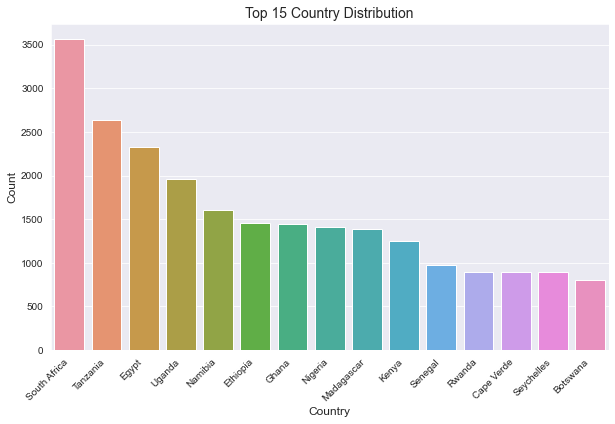

In [161]:
# Countplot of country distribution
country_counts = df['country'].value_counts().sort_values(ascending=False)
top_10_countries = country_counts.head(15)  # Select top 10 countries

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values)

ax.set_xlabel('Country', fontsize=12)  # Set x-axis label and fontsize
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate tick labels
ax.set_ylabel('Count', fontsize=12)  # Set y-axis label and fontsize
ax.set_title('Top 15 Country Distribution', fontsize=14)  # Set plot title

plt.show()

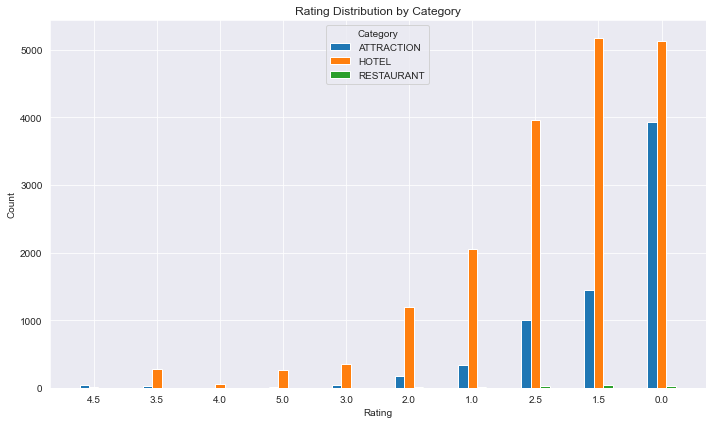

In [162]:
#visualizing ratings per tourist destination category 
# Group the ratings by category
grouped_data = df.groupby('type')['rating'].value_counts().unstack()
# Get unique categories and ratings
categories = df['type'].unique()
ratings = df['rating'].unique()
# Set the width of each bar
bar_width = 0.15
# Calculate the x position for each group of bars
x = np.arange(len(ratings))
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each category within each rating
for i, category in enumerate(categories):
    ax.bar(x + (i * bar_width), grouped_data.loc[category], width=bar_width, label=category)
    # Set the x-axis labels and ticks
    ax.set_xticks(x + ((len(categories) - 1) * bar_width) / 2)
    ax.set_xticklabels(ratings)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_title('Rating Distribution by Category')
    ax.legend(title='Category')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

* From the chart above it can be seen that `hotel` category had higher ratings with an average rate of `4.0` followed by `attraction` while restaurants had lowest ratings based on categories over `3.5` 
* Despite having good ratings the same categories were rated poorly hith `hotel` and `attraction` trailing with rates of `1.5, 1.0` and `2.0` respectively. 

<function matplotlib.pyplot.show(close=None, block=None)>

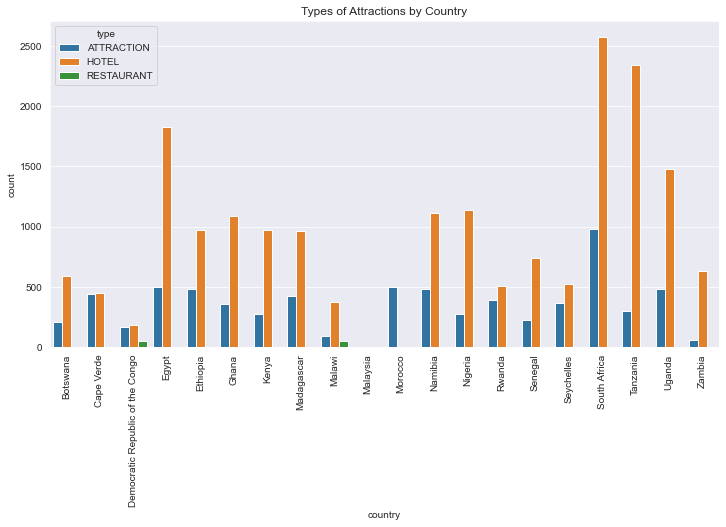

In [163]:
attractions_count = df.groupby(['country', 'type']).size().reset_index(name='count')

# Plot the count of attractions by country and category
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', hue='type', data=attractions_count)
# rotate x-axis labels
plt.xticks(rotation=90)
plt.title('Types of Attractions by Country')
plt.show

In [164]:
df

,id,type,subcategories,name,rating,latitude,longitude,numberOfReviews,amenities,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator,country
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,4.5,-24.652970,25.898460,45,bathroom,141.000000,281.000000,things to do,Okavango Delta,3,5,Botswana
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,3.5,-24.652970,25.898460,115,bathroom,141.000000,281.000000,things to do,Gaborone,7,25,Botswana
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,4.5,-24.652970,25.898460,23,bathroom,141.000000,281.000000,things to do,Gaborone,5,25,Botswana
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,4.5,-23.427362,26.350575,34,bathroom,141.000000,281.000000,things to do,Chobe National Park,3,8,Botswana
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,4.0,-22.201755,26.802690,29,bathroom,141.000000,281.000000,things to do,Gaborone,8,25,Botswana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35357,11924285,HOTEL,[Bed and Breakfast],Kupark Lodge,1.0,-15.588960,28.271020,1,"[Kids Activities, Restaurant, Bar/Lounge, Hot ...",13777.392428,23045.636246,B&Bs / Inns,Kafue,1,1,Zambia
35360,10311379,HOTEL,[Specialty Lodging],Muzala Corporate Lodge,1.0,-15.375338,28.331383,2,"[Kids Activities, Shuttle Bus Service, Room se...",11955.000000,13221.000000,Specialty lodging,Lusaka,65,156,Zambia
35361,11955339,HOTEL,[Bed and Breakfast],Fresh View Hotel,2.0,-16.538395,28.699066,14,"[Restaurant, Air conditioning, Pool, Kids Acti...",13777.392428,23045.636246,Specialty lodging,Siavonga,4,9,Zambia
35363,8695971,HOTEL,[Specialty Lodging],Zambezi Ultima Lodge,2.5,-17.839890,25.860800,2,"[Kids Activities, Laundry Service, Air conditi...",13777.392428,23045.636246,Specialty lodging,Livingstone,65,106,Zambia


The columns `numerator` and `denomintor` are features that capture how popular a particular destination is in its `Location`. We can extract some information `regional_rating` by combining `numerator` and `denominator`

> **Some feature engineering** on above mentioned cols

In [165]:
# New feature we calculate the reciprocal since the Numerator/Denominator would result in lower ranked places
# getting higher values
df['regional_rating'] = (df['Denominator']/df['Numerator']).astype(float)
# Drop num and denom
df.drop(['Numerator', 'Denominator'], axis=1, inplace=True)
df.head()

,id,type,subcategories,name,rating,latitude,longitude,numberOfReviews,amenities,LowerPrice,UpperPrice,RankingType,Location,country,regional_rating
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,4.5,-24.652970,25.898460,45,bathroom,141.0,281.0,things to do,Okavango Delta,Botswana,1.666667
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,3.5,-24.652970,25.898460,115,bathroom,141.0,281.0,things to do,Gaborone,Botswana,3.571429
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,4.5,-24.652970,25.898460,23,bathroom,141.0,281.0,things to do,Gaborone,Botswana,5.000000
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,4.5,-23.427362,26.350575,34,bathroom,141.0,281.0,things to do,Chobe National Park,Botswana,2.666667
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,4.0,-22.201755,26.802690,29,bathroom,141.0,281.0,things to do,Gaborone,Botswana,3.125000


In [166]:
#print current df
df

,id,type,subcategories,name,rating,latitude,longitude,numberOfReviews,amenities,LowerPrice,UpperPrice,RankingType,Location,country,regional_rating
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,4.5,-24.652970,25.898460,45,bathroom,141.000000,281.000000,things to do,Okavango Delta,Botswana,1.666667
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,3.5,-24.652970,25.898460,115,bathroom,141.000000,281.000000,things to do,Gaborone,Botswana,3.571429
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,4.5,-24.652970,25.898460,23,bathroom,141.000000,281.000000,things to do,Gaborone,Botswana,5.000000
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,4.5,-23.427362,26.350575,34,bathroom,141.000000,281.000000,things to do,Chobe National Park,Botswana,2.666667
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,4.0,-22.201755,26.802690,29,bathroom,141.000000,281.000000,things to do,Gaborone,Botswana,3.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35357,11924285,HOTEL,[Bed and Breakfast],Kupark Lodge,1.0,-15.588960,28.271020,1,"[Kids Activities, Restaurant, Bar/Lounge, Hot ...",13777.392428,23045.636246,B&Bs / Inns,Kafue,Zambia,1.000000
35360,10311379,HOTEL,[Specialty Lodging],Muzala Corporate Lodge,1.0,-15.375338,28.331383,2,"[Kids Activities, Shuttle Bus Service, Room se...",11955.000000,13221.000000,Specialty lodging,Lusaka,Zambia,2.400000
35361,11955339,HOTEL,[Bed and Breakfast],Fresh View Hotel,2.0,-16.538395,28.699066,14,"[Restaurant, Air conditioning, Pool, Kids Acti...",13777.392428,23045.636246,Specialty lodging,Siavonga,Zambia,2.250000
35363,8695971,HOTEL,[Specialty Lodging],Zambezi Ultima Lodge,2.5,-17.839890,25.860800,2,"[Kids Activities, Laundry Service, Air conditi...",13777.392428,23045.636246,Specialty lodging,Livingstone,Zambia,1.630769


#### Visualizing  of top `Locations` per country

  Lets get a better sense of `Location`s per country.

In [167]:
# How many locations per country
#list to hold top 5 locations and their counts for each country
top_5_locs_per_country = []
# for loop over top 10 countries
for country in top_10_countries.index:
    country_df = df.loc[df['country']==country].groupby(['Location'])['id'].count().sort_values(ascending=False)[:5]
    curr_top_5_locs = list(country_df.index)
    top_5_value_counts = list(country_df.values)
    top_5_dict = dict(zip(curr_top_5_locs, top_5_value_counts))
    top_5_locs_per_country.append({country: top_5_dict})
    

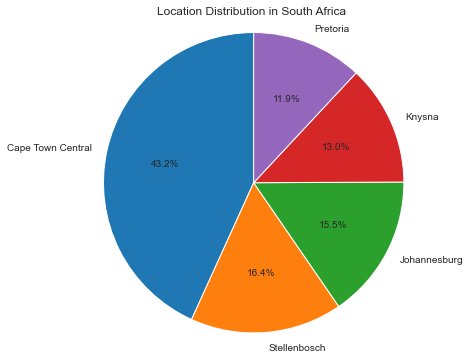

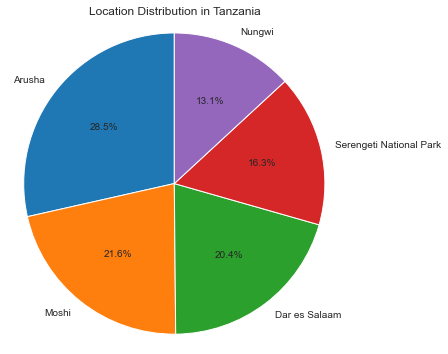

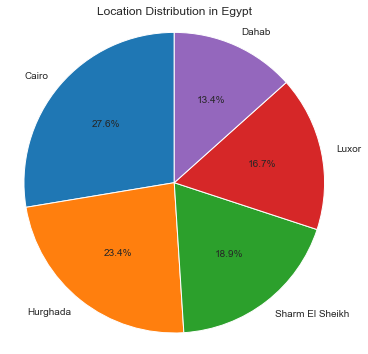

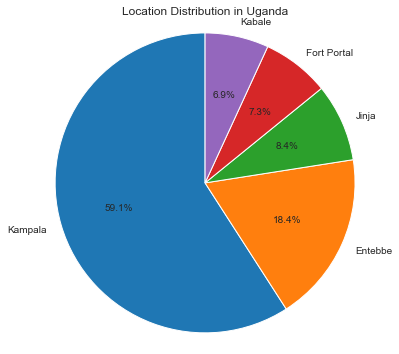

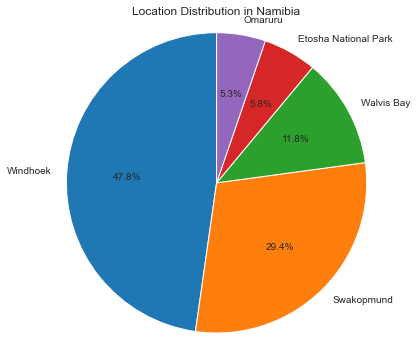

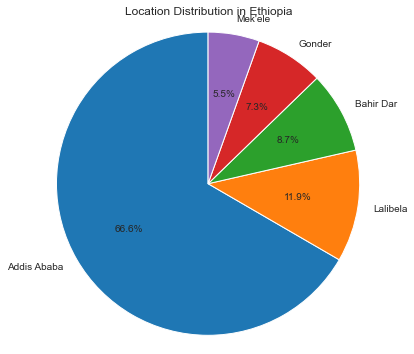

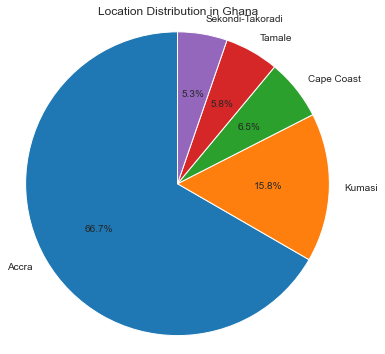

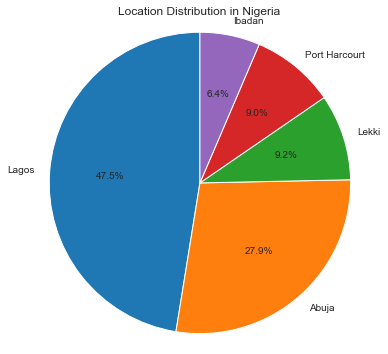

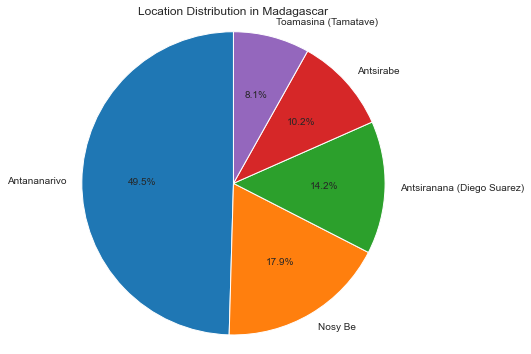

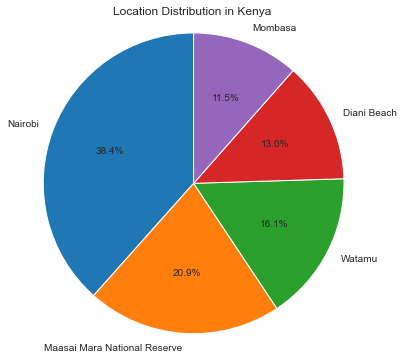

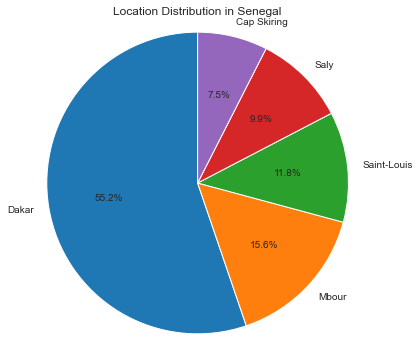

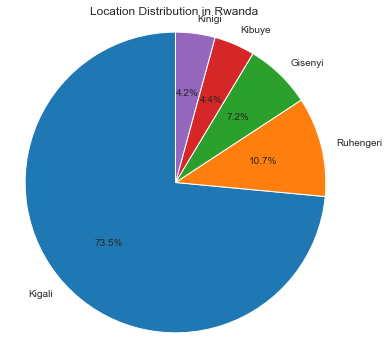

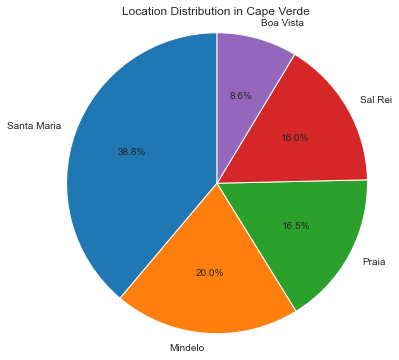

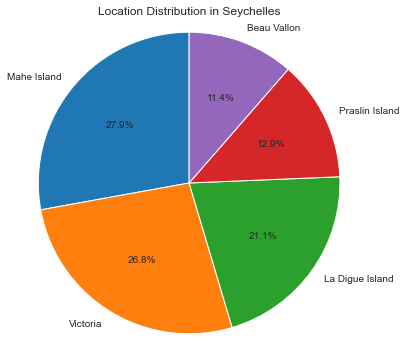

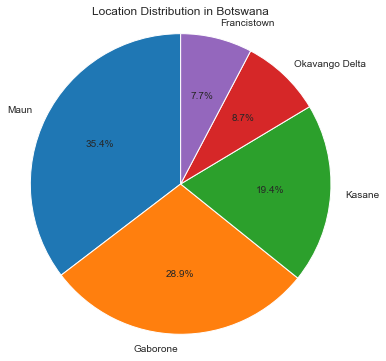

In [168]:

# Loop over the list of dictionaries
for d in top_5_locs_per_country:
    # Get the country name and locations dictionary
    country, locations = list(d.items())[0]
    
    # Get the counts and labels for the pie chart
    counts = list(locations.values())
    labels = list(locations.keys())

    # Create the pie chart
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Location Distribution in {country}')
    plt.axis('equal')
    sns.despine(left=True, bottom=True)
    plt.show()

In [169]:
#current df
df

,id,type,subcategories,name,rating,latitude,longitude,numberOfReviews,amenities,LowerPrice,UpperPrice,RankingType,Location,country,regional_rating
0,1171922,ATTRACTION,[Sights & Landmarks],Khwai River Bridge,4.5,-24.652970,25.898460,45,bathroom,141.000000,281.000000,things to do,Okavango Delta,Botswana,1.666667
1,2513264,ATTRACTION,[Nature & Parks],Gaborone Game Reserve,3.5,-24.652970,25.898460,115,bathroom,141.000000,281.000000,things to do,Gaborone,Botswana,3.571429
2,3247057,ATTRACTION,[Sights & Landmarks],ISKCON Gaborone,4.5,-24.652970,25.898460,23,bathroom,141.000000,281.000000,things to do,Gaborone,Botswana,5.000000
3,478934,ATTRACTION,[Nature & Parks],Serondela Reserve,4.5,-23.427362,26.350575,34,bathroom,141.000000,281.000000,things to do,Chobe National Park,Botswana,2.666667
4,7931216,ATTRACTION,[Nature & Parks],Khutse Game Reserve,4.0,-22.201755,26.802690,29,bathroom,141.000000,281.000000,things to do,Gaborone,Botswana,3.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35357,11924285,HOTEL,[Bed and Breakfast],Kupark Lodge,1.0,-15.588960,28.271020,1,"[Kids Activities, Restaurant, Bar/Lounge, Hot ...",13777.392428,23045.636246,B&Bs / Inns,Kafue,Zambia,1.000000
35360,10311379,HOTEL,[Specialty Lodging],Muzala Corporate Lodge,1.0,-15.375338,28.331383,2,"[Kids Activities, Shuttle Bus Service, Room se...",11955.000000,13221.000000,Specialty lodging,Lusaka,Zambia,2.400000
35361,11955339,HOTEL,[Bed and Breakfast],Fresh View Hotel,2.0,-16.538395,28.699066,14,"[Restaurant, Air conditioning, Pool, Kids Acti...",13777.392428,23045.636246,Specialty lodging,Siavonga,Zambia,2.250000
35363,8695971,HOTEL,[Specialty Lodging],Zambezi Ultima Lodge,2.5,-17.839890,25.860800,2,"[Kids Activities, Laundry Service, Air conditi...",13777.392428,23045.636246,Specialty lodging,Livingstone,Zambia,1.630769


In [170]:
###
###
### MISSING SOME CLEANING STEPS
###
###
###

In [171]:
#loading 'clean_data' into df
clean_df = pd.read_csv('Data/clean_data.csv')

In [172]:
clean_df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rating', 'latitude', 'longitude', 'numberOfReviews', 'amenities',
       'LowerPrice', 'UpperPrice', 'RankingType', 'Rank', 'Total',
       'regional_rating', 'country', 'city'],
      dtype='object')

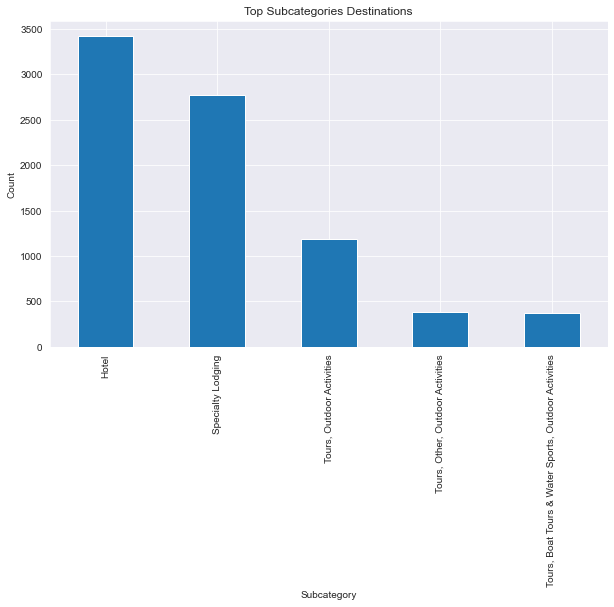

In [173]:
# Get value counts of production companies
subcategory_counts = clean_df['subcategories'].value_counts()

# Select the top 5 production companies
top_subcategories = subcategory_counts[1:6]

# Plot the top production companies
plt.figure(figsize=(10, 6))
top_subcategories.plot(kind='bar')
plt.title('Top Subcategories Destinations')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.savefig('Data/images/top_subcategories')
plt.show()

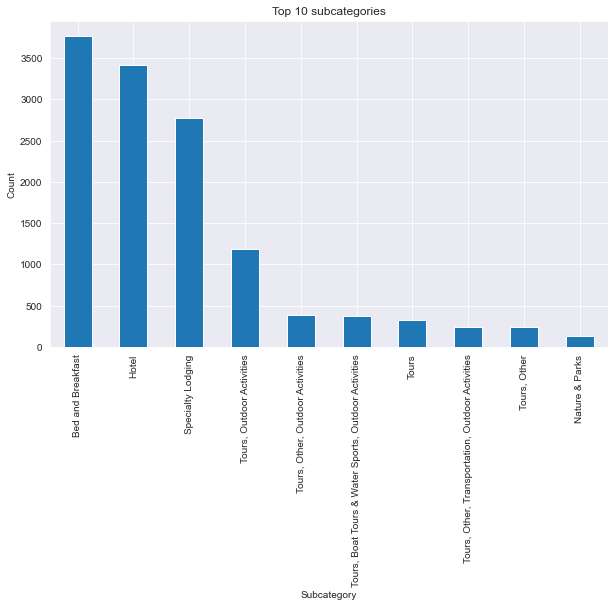

In [174]:
# Plotting 'Subcategoris' (top 10)
plt.figure(figsize=(10, 6))
top_10_subcategories = clean_df['subcategories'].explode().value_counts().head(10)
top_10_subcategories.plot(kind='bar')
plt.title('Top 10 subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.savefig('Data/images/top_10_subcategories_individually.png')
plt.show()

Columns to plot: Index(['id', 'rating', 'latitude', 'longitude', 'numberOfReviews',
       'LowerPrice', 'UpperPrice', 'Rank', 'Total', 'regional_rating'],
      dtype='object')


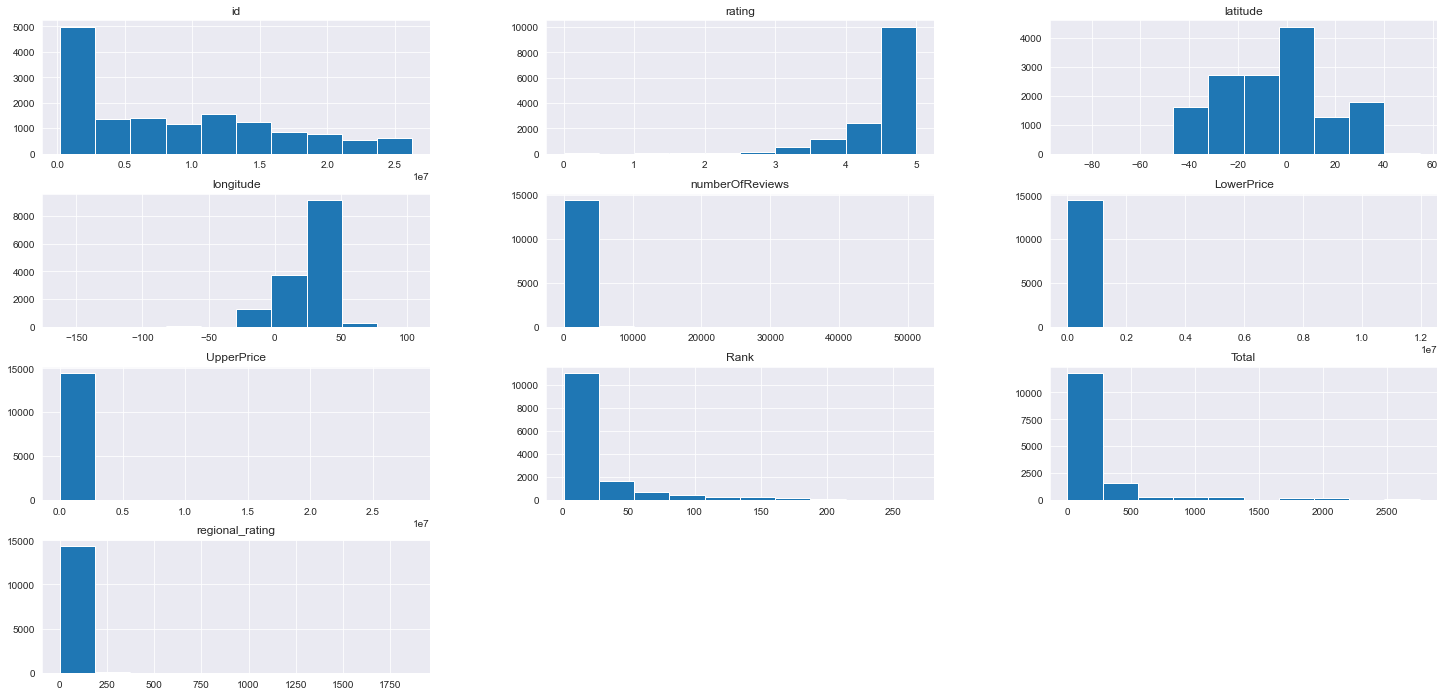

In [175]:
# Histogram plots for each data
# Select the numerical variables to plot
num_cols_to_plot = clean_df.select_dtypes(include=['int64', 'float64']).columns.drop([])
print("Columns to plot:",num_cols_to_plot )
# Create a histogram for each variable
clean_df[num_cols_to_plot].hist(figsize=(25, 12))
plt.savefig('Data/images/Columnstoplot')
plt.show()

In [176]:
# Define the map layout
layout = go.Layout(
    title='Places to visit by Location',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='stamen-terrain',
        bearing=0,
        center=dict(
            lat=clean_df['latitude'].median(),
            lon=clean_df['longitude'].median()
        ),
        pitch=0,
        zoom=10
    ),
)

# Define the map data as a scatter plot of the coordinates
data = go.Scattermapbox(
    lat=clean_df['latitude'],
    lon=clean_df['longitude'],
    mode='markers',
    marker=dict(
        size=5,
        color=clean_df['rating'],
        opacity=0.8
    ),
    text=['Price: ${}'.format(i) for i in clean_df['UpperPrice']],
    hovertext = clean_df.apply(lambda x: f"Ranking Type: ${x['RankingType']}, Location: {x['locationString']}", axis=1),
)

# Create the map figure and show it
fig = go.Figure(data=[data], layout=layout)
plt.savefig('Data/images/map')
fig.show();

<Figure size 432x288 with 0 Axes>

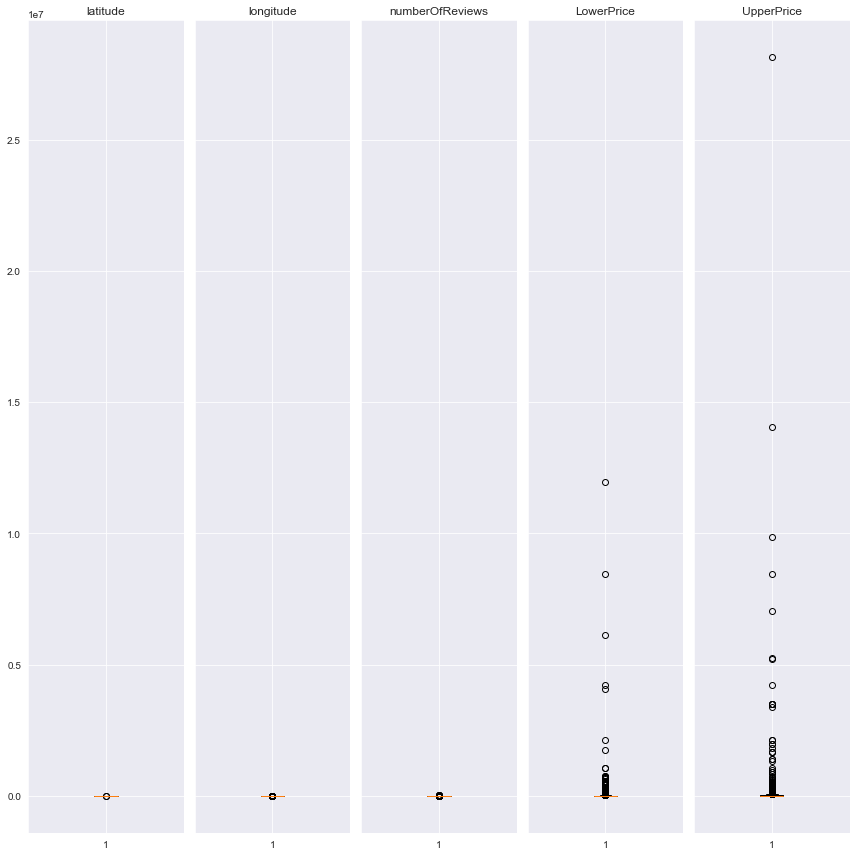

In [177]:
# Select the variables you want to plot

cols_to_plot = ['latitude', 'longitude', 'numberOfReviews', 'LowerPrice', 'UpperPrice']

######## Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(12, 12), sharey=True)

####### Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(clean_df[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='both', which='major')

# Adjust spacing between subplots
plt.tight_layout()
# save te figure
# plt.savefig(r"..Data/images/Outliers.png")
# Show the figure
plt.show()

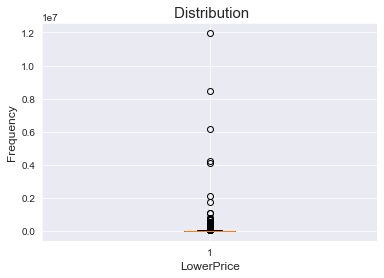

In [178]:
# Checking for outliers in the 'latitude' column
plt.boxplot(clean_df['LowerPrice'])
plt.xlabel("LowerPrice", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(" Distribution", fontsize=15)
# save the figure
#plt.savefig(".data/images/popularity_outliers_plot")
plt.show()

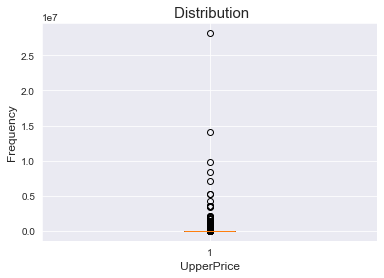

In [179]:
# Checking for outliers in the 'popularity' column
plt.boxplot(clean_df['UpperPrice'])
plt.xlabel("UpperPrice", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(" Distribution", fontsize=15)
# save the figure
# plt.savefig(".data/images/popularity_outliers_plot")
plt.show()

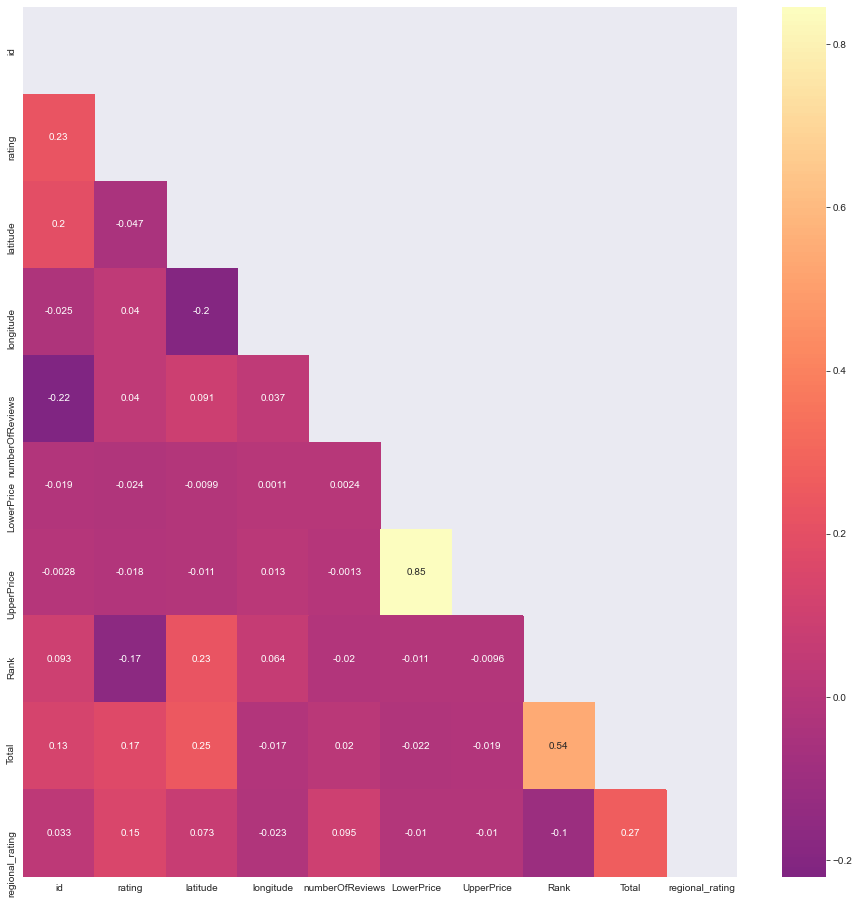

<Figure size 432x288 with 0 Axes>

In [180]:
## Multicollinearity

# Create a correlation matrix
corr_matrix = clean_df.corr()
# Create a fig size
plt.figure(figsize=(16, 16))
# Create a mask to show only the lower triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with the lower triangle mask applied
sns.heatmap(corr_matrix, mask=mask, cmap='magma', center=0, annot=True)
# Show the plot
plt.show();
# Save figure
plt.savefig('Data/images/multicollinearity.png')

## Modelling

Modelling was done on a separate notebook 'modelling.ipynb' using the clean dataframe stored as `clean_data.csv`